In [1]:
import numpy as np
import matplotlib.pyplot as plt
# from numpy.random import choice

In [2]:
# # Run cell to increase font sizes. Useful when saving plots
# SMALL_SIZE = 20
# MEDIUM_SIZE = 24
# BIGGER_SIZE = 28

# plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
# plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
# plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# plt.rcParams["figure.figsize"] = (18,16)

In [3]:
# Declare parameters
#---------------------------------------
n_steps = 10001
nx = 200
T = 1
k = 0.5

n_cells = 1000

# Create initial grid
grid_0 = np.zeros((nx + 2, nx + 2))

# Give each cell a unique integer id
grid_0[1:-1, 1:-1] = np.random.choice(range(1, nx*nx+1), (nx,nx), replace=False)

for j in range(1, nx // 40):
    i = 0
    length = np.random.uniform(0.5 * nx // 40, 1.5 * nx // 40)

print(grid_0)
print(grid_0[10:20, 10:20])

[[    0.     0.     0. ...     0.     0.     0.]
 [    0. 16104. 28668. ... 13259. 34116.     0.]
 [    0.  1182. 18925. ... 17106. 19306.     0.]
 ...
 [    0. 25821. 24392. ... 23494. 30805.     0.]
 [    0. 10156. 17259. ...  9381. 27383.     0.]
 [    0.     0.     0. ...     0.     0.     0.]]
[[24469. 23065. 35607.  9542.  7254. 33736. 26903.  4972.  3114. 22707.]
 [37085. 10974. 24379. 26499.  6858. 28789.  8274. 18954. 10239. 10270.]
 [ 9543. 32890. 25830. 11366.  2775. 26605. 38715. 33004.  2487. 28185.]
 [ 4603.  7779. 34787. 10618. 25155. 35220. 14067. 25676.  7361. 13745.]
 [21022. 29210.  9957. 27609. 27184. 22605. 30492. 31035. 39160.  3342.]
 [  250.  6630. 30110. 29722. 37913. 23838. 15666. 33249. 15106.  8008.]
 [34036. 25000. 32027. 20586. 32155. 27922. 16855.  6957. 36245. 20171.]
 [28004. 34419. 16461.  7727. 22319.  6346. 23616.  1873. 26386.  6394.]
 [23659.  7448.  3751. 28681. 11537. 32390. 33098. 31334.   140. 29539.]
 [34319. 20730. 32241. 13266. 27006.  6751.

In [4]:
def kronecker_delta(i, j):
    return i == j

# def neighborhood_ids(grid, i, j):
#     return grid[i-1, j], grid[i+1, j], grid[i, j-1], grid[i, j+1]

In [33]:
class Cellular_Potts:
    def __init__(self, labda = 1, n_steps = 10001, nx = 400, T = 5, k = 1):
        self.n_steps, self.nx, self.T, self.k, self.labda = n_steps, nx, T, k, labda
        
        # Create initial grid
        self.grid_0 = np.zeros((nx + 2, nx + 2))
        
        # initialize grid like Fig. 4 from paper
        cell_id = 1
        randoms = np.random.choice(range(1, nx*nx+1), nx*nx, replace=False)
        square_size = 0.5
        divisions = 40
        j = int((0.5 - 0.5*square_size) * nx)
        while j < nx - (0.5 - 0.5*square_size) * nx:
            i = int((0.5 - 0.5*square_size) * nx)
            
            while i < nx - (0.5 - 0.5*square_size) * nx:
                length = int(np.random.uniform(1 * nx // (divisions / square_size), 2 * nx // (divisions / square_size)))
                self.grid_0[j : min(int(nx - 0.5 * square_size * nx), j + nx // int(divisions / square_size)), i : min(int(0.5*nx + 0.5 * square_size * nx), i + length)] = randoms[cell_id]
                i += length
                cell_id += 1

            j += nx // int(divisions / square_size)
                
        print(cell_id)

        # Give each cell a unique integer id
#         self.grid_0[1:-1, 1:-1] = np.random.choice(range(1, nx*nx+1), (nx,nx), replace=False)
        # Create grid
        self.grid = self.grid_0.copy()

        # key: cell_ID, value: cell_size
        self.cell_sizes = {}

        for cell_ID in np.unique(self.grid):

            count = np.count_nonzero(self.grid == cell_ID)

            self.cell_sizes[cell_ID] = count
            # self.cell_sizes[0] -= count
        
    def cell_type(self, cell_id):
        # placeholder
        # idk wtf to do here
        if cell_id == 0:
            return 0

        return cell_id % 5 + 1 # cell_id % 2 + 1

    def set_value(self, i, j, new_id):
        self.cell_sizes[self.grid[i,j]] -= 1
        self.grid[i, j] = new_id
        self.cell_sizes[new_id] += 1

    def equilibrium_area(self, cell_type):
        # placeholder
        if cell_type == 0:
            return -10 # or something else negative
        return 40
    
    def cell_area(self, cell_id):
        return self.cell_sizes[cell_id] # np.count_nonzero(self.grid == cell_id)
    
    def J(self, type1, type2):
        # placeholder
        if type1 == 0 or type2 == 0:
            return 0

        if type1 == type2:
            return -1

        return 1
    
    def Moore(self, i, j):
        return self.grid[i-1, j], self.grid[i+1, j], self.grid[i, j-1], self.grid[i, j+1], self.grid[i-1, j-1], self.grid[i+1, j-1], self.grid[i+1, j+1], self.grid[i-1, j+1]
    
    def Hamil_vol(self, cell_ids = None):
        # calculate the Hamiltonian_vol sum for only the given coordinates
        if cell_ids == None:
            cell_ids = np.unique(self.grid)
            
        sum_H = 0
        
        for cell_id in cell_ids:
            if cell_id != 0:
                sum_H += (self.cell_sizes[cell_id] - self.equilibrium_area(self.cell_type(cell_id)))**2
        
        return self.labda * sum_H
    
    def Hamil_bond(self, coordinates = None):
        # calculate the Hamiltonian_bond sum for only the given coordinates
        if coordinates == None:
            coordinates = np.ndindex(self.grid.shape)
        
        sum_H = 0
        
        for coord in coordinates:
            i, j = coord
            if i == 0 or j == 0 or i >= self.nx - 1 or j >= self.nx - 1:
                continue
                
            cell_id = self.grid[i, j]
            for cell_id2 in self.Moore(i, j):
                sum_H += (self.J(self.cell_type(cell_id), self.cell_type(cell_id2)) 
                          * (1 - kronecker_delta(cell_id, cell_id2)))
                
        return sum_H
                
    def Hamiltonian(self):
        return self.Hamil_vol() + self.Hamil_bond()
        
    def step(self):        
        # Randomly choose lattice site 
        i, j = np.random.randint(1, self.nx, 2)
        old_id = self.grid[i, j]
        
        # choose random neighbor
        i2, j2 = ((i-1,j),(i+1,j),(i,j-1),(i,j+1))[np.random.choice(4)]
        new_id = self.grid[i2, j2]
        
        if new_id == old_id:
            return
        
#         old_H = self.Hamiltonian()
        
        # only calculate difference in H for affected cells (much faster!)
        old_H_vol = self.Hamil_vol([old_id, new_id])
        old_H_bond = 2*self.Hamil_bond([(i,j)])
        
        self.set_value(i, j, new_id)
        # self.grid[i, j] = self.grid[i2, j2]
        
        dH_vol = self.Hamil_vol([old_id, new_id]) - old_H_vol 
        dH_bond = 2*self.Hamil_bond([(i,j)]) - old_H_bond

        #         new_H = self.Hamiltonian()
        
        dH = dH_vol + dH_bond
        
#         print(dH, new_H-old_H)
        
        P = np.exp(-(dH) / (self.k * self.T))

        # undo move with opposite probability
        if P < np.random.random():
            self.set_value(i, j, old_id)
            # self.grid[i, j] = old_id

    def draw_borders(self):
        # not great yet
        grid_to_draw = np.zeros((self.nx + 2, self.nx + 2))

        for i, j in np.ndindex(self.grid.shape):
            if i == 0 or j == 0 or i >= self.nx - 1 or j >= self.nx - 1:
                continue
                
            neighbors = self.Moore(i, j)
                
            if (grid_to_draw[i-1,j], grid_to_draw[i+1,j], grid_to_draw[i,j-1], grid_to_draw[i,j+1]).count(1) <= 2 and neighbors.count(neighbors[0]) != len(neighbors):
                grid_to_draw[i, j] = 1
                
        fig = plt.figure(facecolor='w', figsize=(12,4), dpi=130)

        ax = plt.subplot2grid((1, 3), (0, 2))
        ax.matshow(grid_to_draw[1:-1, 1:-1], cmap = 'hot')
        ax.set_title('n = %i' % self.n_steps)
        ax.axis('off')

        plt.tight_layout()
        plt.show()
        
    def plot_colors(self):
        type_grid = np.zeros(self.grid.shape)
        for i, j in np.ndindex(self.grid.shape):
            type_grid[i,j] = self.cell_type(self.grid[i,j])
        
        # Create figures        
#         fig = plt.figure(facecolor='w', figsize=(12,4), dpi=130)

#         ax = plt.subplot2grid((1, 3), (0, 2))
#         ax.matshow(self.grid[1:-1, 1:-1], cmap = 'jet')
#         ax.set_title('n = %i' % i)
#         ax.axis('off')

#         plt.tight_layout()
#         plt.show()
        
        fig, (ax1, ax2) = plt.subplots(1, 2, dpi=170)

        ax1.matshow(self.grid, cmap='jet')
        ax1.set_title("Cell IDs")

        ax2.matshow(type_grid, cmap="jet")
        ax2.set_title("Cell types")
        
        plt.tight_layout()
        plt.show()
        
    def run(self):
        i = 0
        for step in range(self.n_steps):
            
            if i % 1000 == 0:
                print(i, end='\r')
            self.step()
            
            if i % 1000000 == 0:
#                 self.draw_borders()
                self.plot_colors()
                
            i += 1

1157


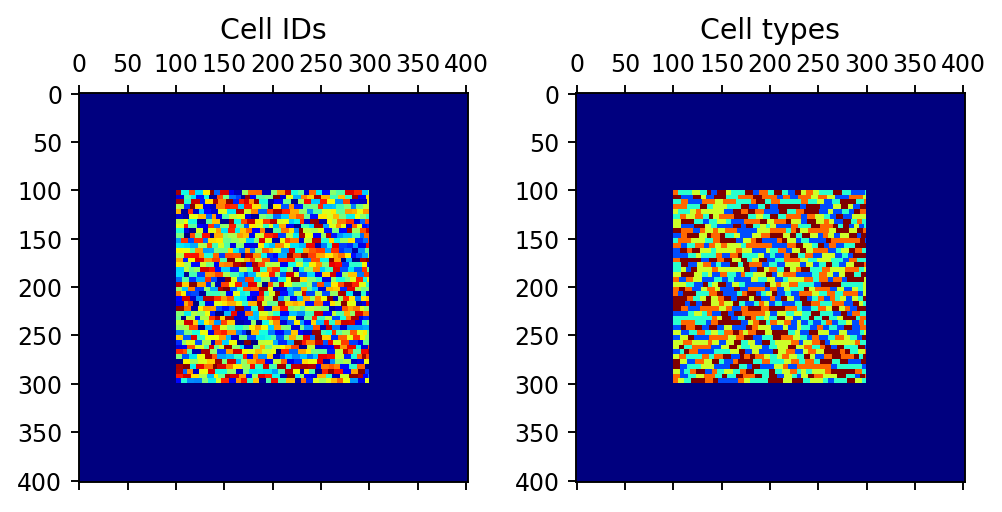

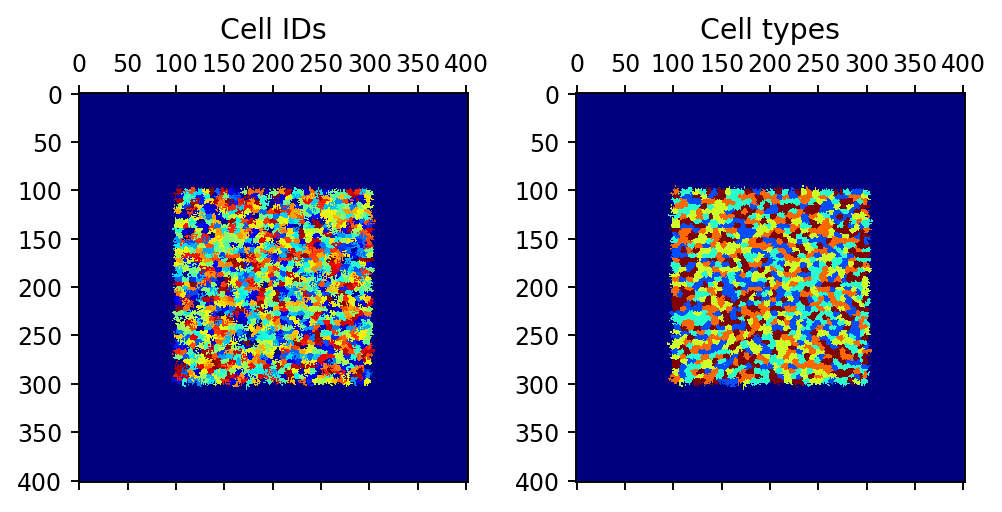

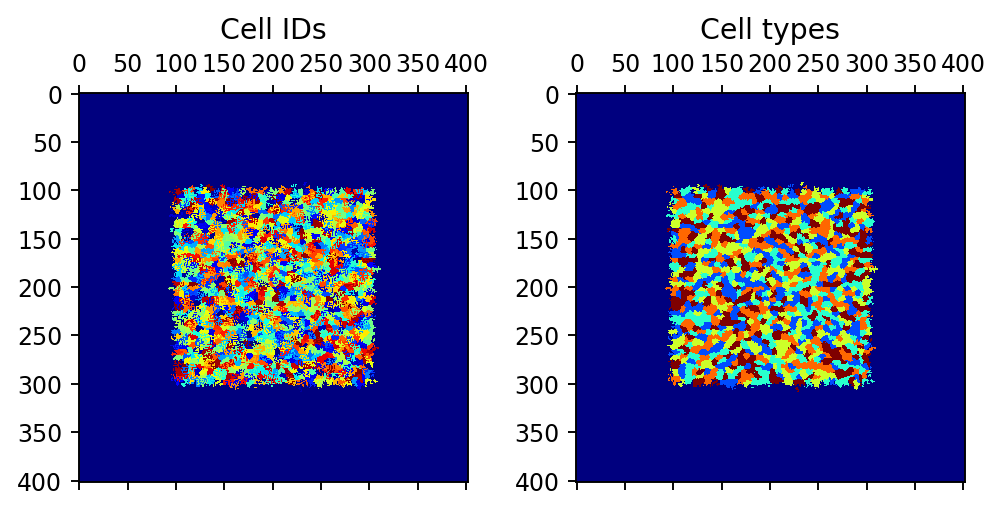

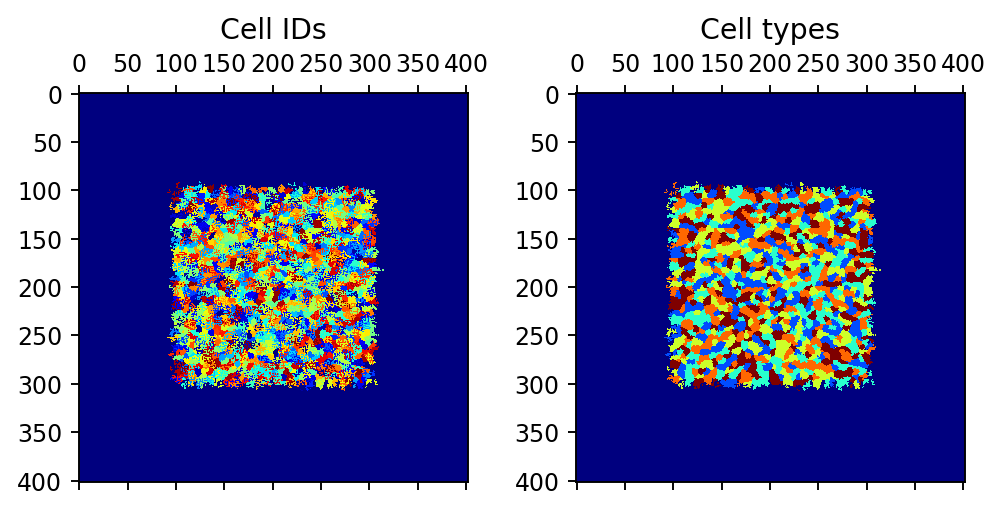

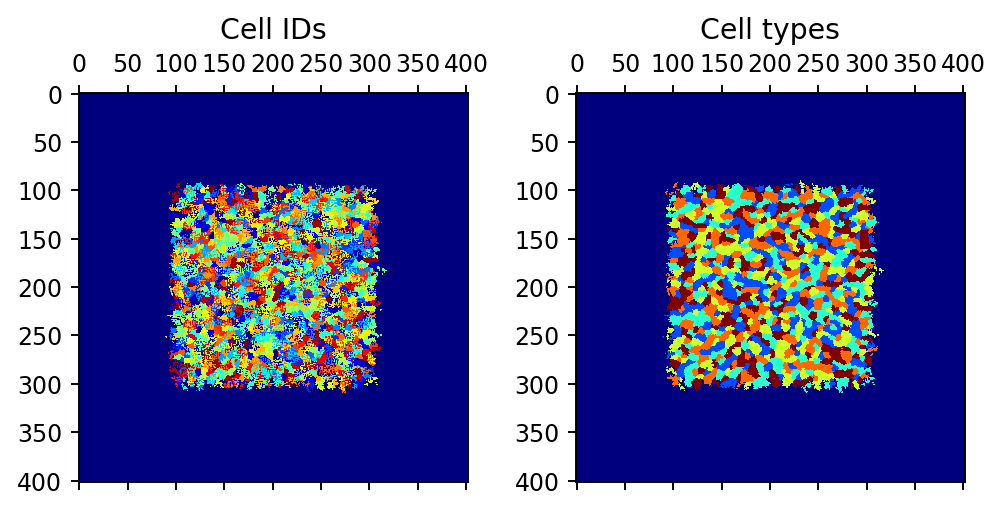

KeyboardInterrupt: 

In [34]:
# for i in [-1, 0, 1]:
Cellular_Potts(n_steps=250000000).run()